# Merge of datasets: Dyspnea, Vaccination, Act_disaggregated

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import json
import requests
#import geopandas as gpd
import omnivida_loader as ov
import statsmodels.api         as sm
import statsmodels.formula.api as smf
%matplotlib inline

In [2]:
adherence, adherence_change = ov.get_adherence_dataset()
dyspnea = ov.get_dyspnea_dataset()

FileNotFoundError: [Errno 2] File ../data/cleansed/Adher.csv does not exist: '../data/cleansed/Adher.csv'

In [4]:
adherence_change.dtypes

id_patient                               int64
survey_date                     datetime64[ns]
morisky_green                           object
smaq1                                   object
smaq2                                   object
espa                                    object
nm_espa                                float64
qualitative_result                      object
quantitative_result                     object
category                              category
morisky_change                          object
smaq1_change                            object
smaq2_change                            object
espa_change                             object
nm_espa_change                         float64
qualitative_result_change               object
quantitative_result_change              object
days_since_last_control                float64
num_reports                              int64
ongoing_adherence_percentage            object
dtype: object

In [7]:
dysp = dyspnea[['id_patient','discharge_date', 'medical_test']] 
# Select these columns to neglect "unnamed: 0" column
dysp.type

,id_patient,discharge_date,medical_test
0,1998401,2016-06-02,0
1,1491934,2016-06-10,0
2,801004,2019-07-12,0
3,1226479,2019-07-26,0
4,1241688,2016-09-01,0
...,...,...,...
132,1690591,2016-03-08,4
133,1690591,2016-06-01,4
134,1718360,2016-12-13,4
135,1718360,2018-03-20,4


In [7]:
dysp = dyspnea.copy()
N_Records_Per_Patient = dysp.groupby('id_patient').size().reset_index(name='N_Records')
N_Records_Per_Patient.head(5)

,id_patient,N_Records
0,524006,5
1,540333,1
2,604083,1
3,622031,3
4,664340,1


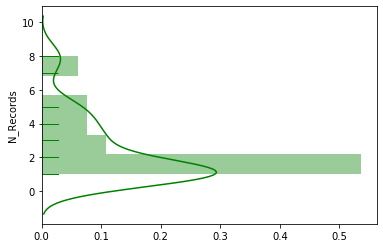

In [8]:
from scipy.stats import norm
sns.distplot(N_Records_Per_Patient['N_Records'], rug = True, vertical = True, color = "green")

In [11]:
num_records_per_category = adherence.groupby('category').size().sort_values(ascending=True).reset_index(name='count_records')

num_records_per_category


,category,count_records
0,N,10
1,N+,472
2,A-,689
3,M,1285
4,A,2317


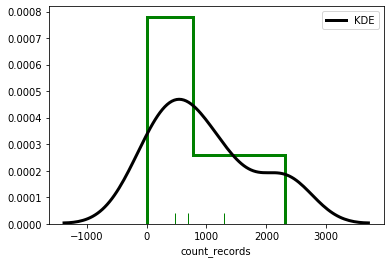

In [12]:
sns.distplot(num_records_per_category['count_records'], rug=True, rug_kws={"color": "g"},
                  kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"})

In [13]:
print("N. Pacientes - dataset Adher: ", adherence.groupby('id_patient').count().shape[0])

N. Pacientes - dataset Adher:  840


In [15]:
dyspnea_adher = adherence.merge(dysp, how = "left", on = "id_patient" )
dyspnea_adher.dtypes

id_patient                      int64
survey_date            datetime64[ns]
morisky_green                  object
smaq1                          object
smaq2                          object
espa                           object
nm_espa                       float64
qualitative_result             object
quantitative_result            object
category                     category
Unnamed: 0                    float64
discharge_date                 object
medical_test                  float64
dtype: object